## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries


In [1]:
# importing all the libraries required
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
from TCGame_Env import TicTacToe

In [2]:
#create object for environemwnrt
env = TicTacToe()

In [3]:
'''
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

'''
def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] 
    return valid_Actions

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state0 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state0 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state0][action]=0

In [6]:
#lets see how our env state is like
env.state

[nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [7]:
#lets see how our env state is like after passing into Q state function
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [8]:
# lets see all possible valid states, (position, unused values)
print("all possible actions that can be taken")
valid_actions(env.state)

all possible actions that can be taken


[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

#### Epsilon-greedy strategy 



In [9]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    
    j = np.random.random()
        
    if j > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    
    
    return action




#### Tracking the state-action pairs for checking convergence - write your code here

In [10]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [11]:
# Initialising states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-3-x-x-1-x-x-x-x',(7,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-5-x-x-x-x-5-7-x',(8,2)),('x-x-x-x-x-x-x-x-x',(6,5))]    #select some 4 Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []
    
    return 
  


initialise_tracking_states()
  

In [12]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [13]:
# saving states at intervals
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [14]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [15]:
#Defining parameters for the training

EPISODES = 50000 # change how many times you want to run this code
LR = 0.01 # learning rate or convergance rate                    
GAMMA = 0.9 # Dicount       

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001       
threshold = 200       
policy_threshold = 300 


### Q-update loop ---write your code here

In [16]:
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # create the environment
    curr_state = env.state    
    done = False  
    add_to_dict(curr_state)  

    while done != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   
        next_state, reward, done = env.step(curr_state, curr_action) 
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)


        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
                
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        
        curr_state = next_state
 

    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')


    if ((episode+1)% policy_threshold) == 0:  #every policy episode saved
        save_obj(Q_dict,'Policy_Q_dict')  
        


elapsed_time = time.time() - start_time

In [17]:

save_obj(States_track,'States_tracking')   
save_obj(Q_dict,'Policy_Q_dict')
print("Time taken in secs",elapsed_time)

Time taken in secs 116.96746349334717


#### Check the Q-dictionary

In [18]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.0066974665750579,
              (0, 3): -1.0066881408624824,
              (0, 5): -1.0066978439956353,
              (0, 7): -1.0067014493591562,
              (0, 9): -1.0066879553692458,
              (1, 1): -1.0067091672086244,
              (1, 3): -1.0066895881413502,
              (1, 5): -1.0067059073607443,
              (1, 7): -1.0067023638733206,
              (1, 9): -1.0066879231411023,
              (2, 1): -1.0066888539364376,
              (2, 3): -1.006699139589783,
              (2, 5): -1.006702938604104,
              (2, 7): -1.006699749269251,
              (2, 9): -1.0066933083308747,
              (3, 1): -1.006693366599903,
              (3, 3): -1.0066961180342011,
              (3, 5): -1.0066867344174288,
              (3, 7): -1.0067034692943149,
              (3, 9): -1.0066978731349492,
              (4, 1): -1.0066880009143702,
              (4, 3): -1.0066948464598005,
              (4, 5

In [19]:
len(Q_dict)

130361

#### Check the states tracked for Q-values convergence

<function matplotlib.pyplot.show(*args, **kw)>

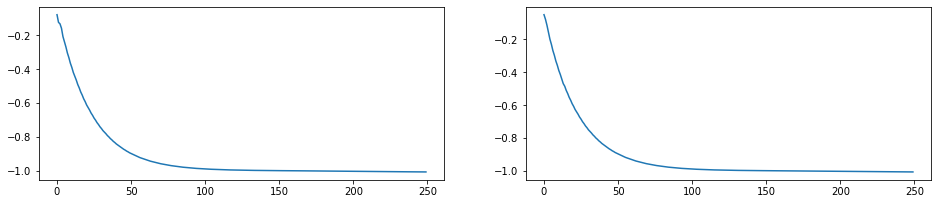

In [20]:
plt.figure(0, figsize=(16,7))


x = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(221)
plt.plot(x,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.show

x = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(222)
plt.plot(x,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.show






### Epsilon - decay check

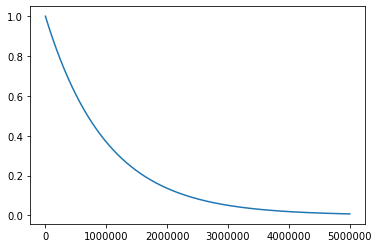

In [21]:
# lets see what is happening with our epsilon value 
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))
    
plt.plot(time, epsilon)
plt.show()